In [2]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Column
import numpy as np
import pandas as pd
from scipy.spatial import cKDTree
from astropy.table import Table

**ZERO POINT ESTRELLA B**

In [3]:
HIP_B= fits.open(r'C:\Yop\imagenes_astro\Estrellas\HIP117445_B_reducida.fit')[0] # traemos los archivos a trabajar
HIP_V = fits.open(r'C:\Yop\imagenes_astro\Estrellas\HIP117445_V_reducida.fit')[0]

NGC2070_B = fits.open(r'C:\Yop\imagenes_astro\raw\NGC2070B.fit')[0]
NGC2070_V = fits.open(r'C:\Yop\imagenes_astro\raw\NGC2070V.fit')[0]

In [4]:
data_B = HIP_B.data          # extraemos los datos
header_B = HIP_B.header      # extraemos el header
header_B

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'CAmus, Rodriguez, Morales, Guerrero' / SBIGFITSEXT The name of the ob
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{90e0c4d9-2845-44

In [5]:
# Obtenemos el umbral que utilizaremos para detectar las fuentes

threshold_B = detect_threshold(data_B, nsigma = 4) # libreria photutils, sigma la desviacion estandar por pixel
                                                   # para considerar el pixel como parte de la fuente


# Utilizamos el umbral y el array de la estrella para detectar n fuentes

source_B = detect_sources(data_B, threshold_B, npixels = 10) #5 npixels: cantidad min de pixeles que se considera fuente


# número de fuentes detectadas 
source_B

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 94
labels: [ 1  2  3  4  5 ... 90 91 92 93 94]

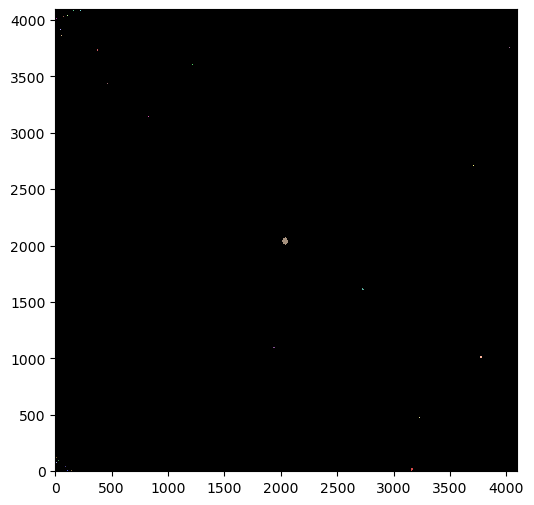

In [6]:
#asocia un color a cada fuente detectada
cmap_source = source_B.make_cmap(seed=9983) #seed: la semilla de la paleta de colores


#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.imshow(source_B, origin = 'lower', cmap = cmap_source, interpolation = 'nearest')
plt.show()

In [7]:
#Obtenemos el catálogo
catalogo_B = SourceCatalog(data_B, source_B)
tbl_B = catalogo_B.to_table() #Lo pasamos a tabla y  mostramos
tbl_B

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,22.102440246705534,4.924603309699198,None,19,26,0,9,19.0,2.6332500373580427,1.9124654271154846,86.77528198854982,0.6874035609475816,40.08489695478315,126.09192065795838,0.0,1126.8157024219631,nan,-28.20048575123667,nan
2,110.78285823841053,7.224728557594763,None,107,114,2,13,16.0,3.8762415717038112,0.7740737862840383,62.18070936440167,0.9798576993413937,33.804409857328146,133.08415032679738,0.0,861.6831378750932,nan,324.1333946163459,nan
3,150.18292640660815,4.315613684143086,None,146,154,3,5,11.0,2.5996357461474937,0.7065022581872239,-1.2100407766916779,0.9623623141040464,33.97538846595057,75.74109690373032,0.0,529.7784920584442,nan,1208.1491817791214,nan
4,3165.594350330409,15.679082564414257,None,3153,3178,3,29,446.0,4.862381616924036,4.553760266017234,-43.29362318976617,0.3505907391966194,33.49823086460822,670.7151074780502,0.0,77911.5382267173,nan,86201.68386812344,nan
5,53.3788425640889,7.89252023762772,None,51,56,5,11,14.0,2.0354619660222038,1.2364940163769815,56.37963509641072,0.7943381362493737,39.12805885002252,116.89280908955,0.0,866.1025346036386,nan,638.6676585718499,nan
6,4065.159502229072,9.413691716900798,None,4063,4068,7,11,11.0,1.754665667523952,1.3579995941648337,-7.957243304088934,0.6332633577766809,33.94706679170574,75.93367941519229,0.0,542.7247982668882,nan,318.9842505184815,nan
7,16.802427432610685,17.339966443169168,None,14,20,14,21,22.0,2.2776257178876156,1.4354946031587699,61.6170523334503,0.7763847747798663,39.48969696969697,112.65922665828356,0.0,1246.3045193264168,nan,769.139478105656,nan
8,43.631801419490955,16.124461046148003,None,41,46,14,18,12.0,1.3153685837664082,1.1180189306585246,-19.294466335011272,0.526837107164165,38.9293502613891,216.3410805916088,0.0,832.0175738795971,nan,350.0054757571016,nan


**Proceso de limpieza de los datos**

In [8]:
tabla_B = tbl_B['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux'] # organizamos, solo la data importante
tabla_B

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,22.102440246705534,4.924603309699198,19.0,1126.8157024219631
2,110.78285823841053,7.224728557594763,16.0,861.6831378750932
3,150.18292640660815,4.315613684143086,11.0,529.7784920584442
4,3165.594350330409,15.679082564414257,446.0,77911.5382267173
5,53.3788425640889,7.89252023762772,14.0,866.1025346036386
6,4065.159502229072,9.413691716900798,11.0,542.7247982668882
7,16.802427432610685,17.339966443169168,22.0,1246.3045193264168
8,43.631801419490955,16.124461046148003,12.0,832.0175738795971


**Realmente "segment_flux" es la luminosidad, por lo que debemos obtener el flujo de verdad de cada estrella**

In [10]:
tabla_B['segment_flux'] = tabla_B['segment_flux']/header_B['EXPTIME'] #Dividimos el "flujo"(energy) por el tiempo de exposición 
tabla_B

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,22.102440246705534,4.924603309699198,19.0,13.911304968172384
2,110.78285823841053,7.224728557594763,16.0,10.638063430556706
3,150.18292640660815,4.315613684143086,11.0,6.540475210598077
4,3165.594350330409,15.679082564414257,446.0,961.8708423051519
5,53.3788425640889,7.89252023762772,14.0,10.692623883995537
6,4065.159502229072,9.413691716900798,11.0,6.700306151443065
7,16.802427432610685,17.339966443169168,22.0,15.386475547239712
8,43.631801419490955,16.124461046148003,12.0,10.271821899748112


In [11]:
# Nuestra estrella a estudiar, que es la fuente con mayor area
estrellaB = np.argmax(tabla_B['area']) 

estrella_flujoB = tabla_B['segment_flux'][estrellaB] # buscamos el flujo de "estrella"(será el flujo de la fuente con mayor área)

magnitud_aparente_B = -2.5*np.log(estrella_flujoB) # Calculamos la magnitud aparente

zeropoint_B = 7 - magnitud_aparente_B  # Obtenemos el zeropoint para calibrar
zeropoint_B, 'zero point filtro B para nuestro telescopio'

(33.755035740950824, 'zero point filtro B para nuestro telescopio')

In [12]:
# ahora utilizamos el zeropoint para obtener la magnitud de todas las fuentes

flujo_fuentes_B = tabla_B['segment_flux']  

tabla_B['magnitude'] = zeropoint_B - 2.5*np.log(flujo_fuentes_B)
tabla_B

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,22.102440246705534,4.924603309699198,19.0,13.911304968172384,27.173281199339737
2,110.78285823841053,7.224728557594763,16.0,10.638063430556706,27.84393959359674
3,150.18292640660815,4.315613684143086,11.0,6.540475210598077,29.060011178450075
4,3165.594350330409,15.679082564414257,446.0,961.8708423051519,16.582835285715745
5,53.3788425640889,7.89252023762772,14.0,10.692623883995537,27.83115037315985
6,4065.159502229072,9.413691716900798,11.0,6.700306151443065,28.999652691955315
7,16.802427432610685,17.339966443169168,22.0,15.386475547239712,26.921313460080857
8,43.631801419490955,16.124461046148003,12.0,10.271821899748112,27.931524720007992


In [13]:
# comprobamos la magnitud aparente de nuestra estrella para el filtro B

magnitud_a_B = tabla_B['magnitude'][estrellaB]
magnitud_a_B

7.0

**ZERO POINT ESTRELLA V**

In [14]:
data_V = HIP_V.data
header_V = HIP_V.header
header_V

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'CAmus, Rodriguez, Morales, Guerrero' / SBIGFITSEXT The name of the ob
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{ff63206e-4e12-43

In [15]:
# Obtenemos el umbral que utilizaremos para detectar las fuentes

threshold_V = detect_threshold(data_V, nsigma = 4)# sigma la desviacion estandar por pixel para considerarlo como fuente

# Utilizamos el umbral y el array de la estrella para detectar fuentes
source_V = detect_sources(data_V, threshold_V, npixels = 10)# npixels: tamaño  min de pixeles que se considera fuente

# número de fuentes detectadas 
source_V

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 882
labels: [  1   2   3   4   5 ... 878 879 880 881 882]

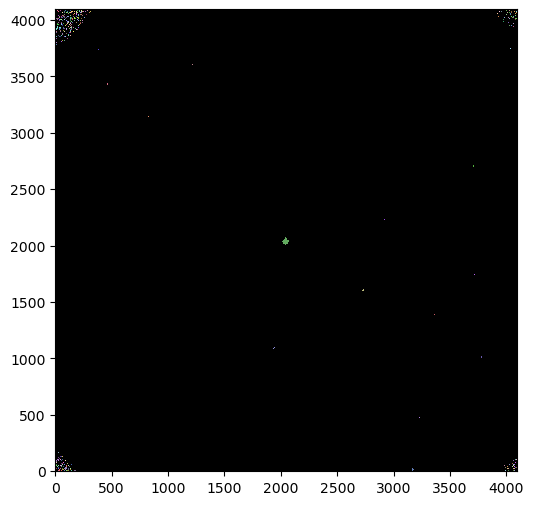

In [16]:
#asocia un color a cada fuente detectada
cmap_source = source_V.make_cmap(seed=9983) #seed: la semilla de la paleta de colores

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.imshow(source_V, origin = 'lower', cmap = cmap_source, interpolation = 'nearest')
plt.show()

In [17]:
catalogo_V = SourceCatalog(data_V, source_V)  
tbl_V = catalogo_V.to_table() # Lo pasamos a tabla y luego lo mostramos
tbl_V

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,4.533569025871889,3.444939474958292,None,0,9,0,7,28.0,2.7852013342829314,1.6219188344097757,-6.647043822150399,0.8129492768678318,41.154574132492115,209.81022836925058,0.0,2505.2411062188844,nan,-1309.9593445651758,nan
2,22.507132975854155,13.250087815892254,None,11,34,0,30,154.0,9.381682970452795,3.8424776443758812,58.516977407553355,0.9122776529264195,38.95491191400418,380.2266839378238,0.0,15148.910081151724,nan,-19048.709939630935,nan
3,26.734313787956406,2.767497535389367,None,25,29,0,5,12.0,1.5169211566461964,1.2438983470624618,-81.57242362021555,0.5723417992012156,41.115663410022066,252.74782047142395,0.0,1600.700112157337,nan,-182.98742952753466,nan
4,55.90401422039968,7.904389065335463,None,36,75,0,21,232.0,9.664650944264762,5.393154005160392,-4.948652610552603,0.8298215518928241,38.05717619603267,307.50736593989393,0.0,20029.33847174423,nan,-22937.657337697874,nan
5,81.04186216504205,5.955181395464425,None,72,87,0,14,70.0,3.822081508774394,3.330681042003776,21.099303688147057,0.49051776627049853,37.596541786743515,328.5659259259259,0.0,6538.17641989125,nan,-5903.906026653272,nan
6,91.55295150995757,2.9725235567958834,None,89,94,0,5,14.0,1.9901989679624703,1.0272441066665197,-46.15089402929081,0.856497325413402,37.58571016997983,169.13569576490926,0.0,1154.9977799979365,nan,-381.54435604754315,nan
7,99.68768173144424,2.6169679046829066,None,96,104,0,6,27.0,2.613207211754222,1.466182076641842,-24.304419052843834,0.8277709764257084,37.81449275362319,364.0922444183314,0.0,2566.43179459639,nan,-1363.899038118597,nan
8,116.75063364593193,2.883633961891127,None,105,127,0,7,54.0,6.144953519919915,1.685188174805887,3.0442599488996107,0.9616614625649353,36.3195991091314,261.6676217765043,0.0,5068.480748058068,nan,-3803.926253248575,nan


In [18]:
tabla_V = tbl_V['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux'] # organizamos data importante
tabla_V

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,4.533569025871889,3.444939474958292,28.0,2505.2411062188844
2,22.507132975854155,13.250087815892254,154.0,15148.910081151724
3,26.734313787956406,2.767497535389367,12.0,1600.700112157337
4,55.90401422039968,7.904389065335463,232.0,20029.33847174423
5,81.04186216504205,5.955181395464425,70.0,6538.17641989125
6,91.55295150995757,2.9725235567958834,14.0,1154.9977799979365
7,99.68768173144424,2.6169679046829066,27.0,2566.43179459639
8,116.75063364593193,2.883633961891127,54.0,5068.480748058068


In [19]:
tabla_V['segment_flux'] = tabla_V['segment_flux']/header_V['EXPTIME'] #Dividimos el "flujo"(energy) por el tiempo de exposición 
tabla_V    

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,4.533569025871889,3.444939474958292,28.0,1002.0964424875538
2,22.507132975854155,13.250087815892254,154.0,6059.564032460689
3,26.734313787956406,2.767497535389367,12.0,640.2800448629348
4,55.90401422039968,7.904389065335463,232.0,8011.7353886976925
5,81.04186216504205,5.955181395464425,70.0,2615.2705679564997
6,91.55295150995757,2.9725235567958834,14.0,461.9991119991746
7,99.68768173144424,2.6169679046829066,27.0,1026.572717838556
8,116.75063364593193,2.883633961891127,54.0,2027.392299223227


In [20]:
# Nuestra estrella a estudiar, que es la fuente con mayor area
estrellaV = np.argmax(tabla_V['area']) 

estrella_flujoV = tabla_V['segment_flux'][estrellaV] # buscamos el flujo de "estrella"(el flujo de aquella fuente con mayor área)

magnitud_aparente_V = -2.5*np.log(estrella_flujoV) # Calculamos la magnitud aparente

zeropoint_V = 6.47 - magnitud_aparente_V # Obtenemos el zeropoint para calibrar
zeropoint_V

42.607877451282214

In [21]:
# utilizamos el zeropoint para obtener la magnitud absoluta de todas las fuentes

flujo_fuentes_V = tabla_V['segment_flux'] # columna "segment_flux"

tabla_V['magnitude'] = zeropoint_V - 2.5*np.log(flujo_fuentes_V)
tabla_V

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,4.533569025871889,3.444939474958292,28.0,1002.0964424875538,25.333253633780572
2,22.507132975854155,13.250087815892254,154.0,6059.564032460689,20.834394614689085
3,26.734313787956406,2.767497535389367,12.0,640.2800448629348,26.453113324416776
4,55.90401422039968,7.904389065335463,232.0,8011.7353886976925,20.13622077786264
5,81.04186216504205,5.955181395464425,70.0,2615.2705679564997,22.935070354241205
6,91.55295150995757,2.9725235567958834,14.0,461.9991119991746,27.268970028781755
7,99.68768173144424,2.6169679046829066,27.0,1026.572717838556,25.27292476499838
8,116.75063364593193,2.883633961891127,54.0,2027.392299223227,23.571613289806944


In [22]:
# comprobamos la magnitud absoluta de nuestra estrella para el filtro B

magnitud_ab_V = tabla_V['magnitude'][estrellaV] 
magnitud_ab_V

6.469999999999999

**Por lo tanto, al obtener el zero point de la segunda estrella (mismo proceso), los promediamos para ambos filtros**


**Filltro V promedio = (42.6 + 41.4)/2 = 42** 


**Filtro B promedio = (35.1 + 33.7)/2 = 34.4**


In [4]:
zeropointB_total = 34.4
zeropointV_total = 42

**Catalogo NGC2070 B**

In [5]:
data_ngcb = NGC2070_B.data
header_ngcb = NGC2070_B.header
header_ngcb

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Riffo, Cornejo,Liberona' / SBIGFITSEXT The name of the observer      
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{0a80ae66-d416-4b

In [6]:
#Obtenemos el umbral que utilizaremos para detectar las fuentes

threshold_ngcb = detect_threshold(data_ngcb, nsigma = 3) # sigma la desviacion estandar por pixel para considerarlo como fuente

#Utilizamos el umbral y el array de la estrella para detectar fuentes
source_ngcb = detect_sources(data_ngcb, threshold_ngcb, npixels = 15) # npixels: tamaño  min de pixeles que se considera fuente

#número de fuentes detectadas 
source_ngcb

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 1597
labels: [   1    2    3    4    5 ... 1593 1594 1595 1596 1597]

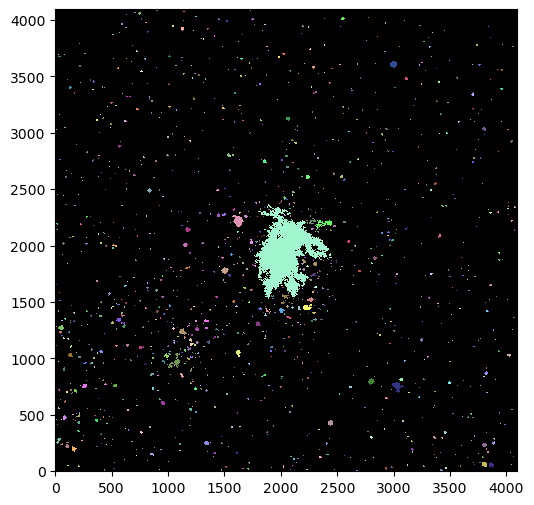

In [7]:
#asocia un color a cada fuente detectada
cmap_source = source_ngcb.make_cmap(seed=9283) #seed: la semilla de la paleta de colores
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.imshow(source_ngcb, origin = 'lower', cmap = cmap_source, interpolation = 'nearest')
plt.show()

In [8]:
catalogo_ngcb = SourceCatalog(data_ngcb, source_ngcb)
tabla_ngcb = catalogo_ngcb.to_table();
tabla_ngcb = tabla_ngcb['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux'] # organizamos data importante
tabla_ngcb['segment_flux'] = tabla_ngcb['segment_flux']/header_ngcb['EXPTIME'] #Dividimos el "flujo"(energy) por el tiempo de exposición 
tabla_ngcb  

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,2588.103550169616,3.4515078133930643,36.0,29.519933946039956
2,2675.954354651062,2.940390251152407,84.0,73.94538177791355
3,3423.668897632228,5.1153665974163856,422.0,969.2597894560656
4,3625.636166464378,5.841086280211863,29.0,23.029250391043515
5,436.95046189687855,8.60795610540508,69.0,55.45327510382217
6,1475.9771529228296,9.410289669622706,146.0,123.33322366981764
7,924.7326176312736,14.15402944764285,140.0,122.85974269829556
8,2236.5835613879344,14.153470496357468,179.0,163.9065637741927


In [9]:
# Nuestra estrella a estudiar, que es la fuente con mayor area
ngc2070b = np.argmax(tabla_ngcb['area']) 

flujo_ngc2070b = tabla_ngcb['segment_flux'][ngc2070b] # buscamos el flujo de "estrella" (el flujo de aquella fuente con mayor area)

#magnitud absoluta 2070b, con zeropoint obtenido de la estrella

mag_abs_ngcb = zeropointB_total - 2.5*np.log(flujo_ngc2070b)

flujo_ngc2070b, mag_abs_ngcb

(327200.5440035483, 2.6541786342203046)

In [10]:
flujo_fuentes_ngcb = tabla_ngcb['segment_flux'] # obtenemos columna segment flux

tabla_ngcb['magnitude'] = zeropointB_total - 2.5*np.log(flujo_fuentes_ngcb) # calibramos cada fuente
tabla_ngcb

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,2588.103550169616,3.4515078133930643,36.0,29.519933946039956,25.93733559467626
2,2675.954354651062,2.940390251152407,84.0,73.94538177791355,23.641683158490594
3,3423.668897632228,5.1153665974163856,422.0,969.2597894560656,17.208668308669786
4,3625.636166464378,5.841086280211863,29.0,23.029250391043515,26.558087089838438
5,436.95046189687855,8.60795610540508,69.0,55.45327510382217,24.361148059643167
6,1475.9771529228296,9.410289669622706,146.0,123.33322366981764,22.36277543048469
7,924.7326176312736,14.15402944764285,140.0,122.85974269829556,22.372391496334764
8,2236.5835613879344,14.153470496357468,179.0,163.9065637741927,21.65175866904889


In [11]:
# comprobamos la magnitud absoluta de nuestra estrella para el filtro B

magnitud_ab_ngc2070b = tabla_ngcb['magnitude'][ngc2070b]
magnitud_ab_ngc2070b 

2.6541786342203046

**CALIBRACION NGC2070 V**

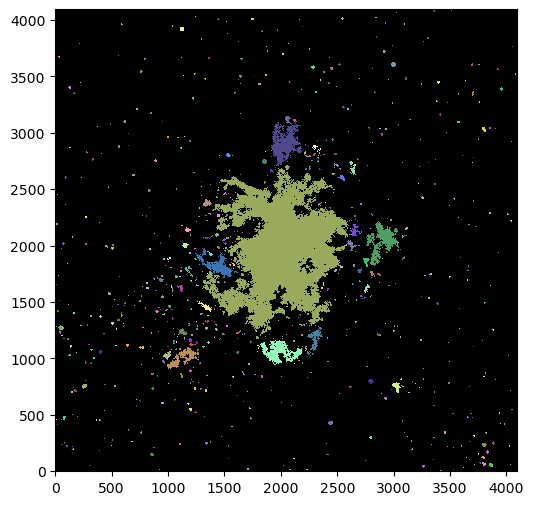

In [12]:
data_ngcv = NGC2070_V.data
header_ngcv = NGC2070_V.header

#Obtenemos el umbral que utilizaremos para detectar las fuentes

threshold_ngcv = detect_threshold(data_ngcv, nsigma = 3) # sigma la desviacion estandar por pixel para considerarlo como fuente

#Utilizamos el umbral y el array de la estrella para detectar fuentes
source_ngcv = detect_sources(data_ngcv, threshold_ngcv, npixels = 15) #npixels: tamaño  min de pixeles que se considera fuente

#número de fuentes detectadas 
source_ngcv

#asocia un color a cada fuente detectada
cmap_source = source_ngcv.make_cmap(seed = 9283) #seed: la semilla de la paleta de colores

#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
ax.imshow(source_ngcv, origin = 'lower', cmap = cmap_source, interpolation = 'nearest')
plt.show()

In [13]:
header_ngcv

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
OBSERVER= 'Riffo, Cornejo,Liberona' / SBIGFITSEXT The name of the observer      
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '           / SBIGFITSEXT The model Telescope                
FOCALLEN=                6500. / SBIGFITSEXT Telescope focal length in mm       
APTDIA  =                 500. / SBIGFITSEXT Aperture diameter in mm            
SBUUID  = '{8afdf533-5ad9-44

In [14]:
catalogo_ngcv = SourceCatalog(data_ngcv, source_ngcv) # creamos catologo
tabla_ngcv = catalogo_ngcv.to_table(); # convertimos a tabla
tabla_ngcv = tabla_ngcv['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']# organizamos data importante
tabla_ngcv['segment_flux'] = tabla_ngcv['segment_flux']/header_ngcv['EXPTIME']# Dividimos el "flujo"(energy) por el tiempo 
tabla_ngcv                                                                     # de exposición 

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,3421.055959411376,4.424132500404846,208.0,502.12943941423447
2,2084.927114466944,15.29746086125732,156.0,204.77822112557135
3,1711.8003135994995,18.539506752339,310.0,655.9677521191092
4,923.0684847246181,14.625760800853879,36.0,37.37500492998914
5,2234.2549134375445,14.501379536742217,68.0,71.6785788821078
6,2474.46306667768,15.689387745813319,21.0,20.87708304101735
7,3534.0094320508633,15.973813717402807,25.0,25.480739334600404
8,3621.5443007687913,28.370205983440428,46.0,46.728068564760896


In [15]:
# obtenemos la estrella, que sera la de mayor area
ngc2070v = np.argmax(tabla_ngcv['area']) 

flujo_ngc2070v = tabla_ngcv['segment_flux'][ngc2070v] # flujo de ngc2070

mag_a_ngcv = zeropointV_total - 2.5*np.log(flujo_ngc2070v)

mag_a_ngcv, flujo_ngc2070v

(4.921370588296405, 2761961.751343275)

In [16]:
flujo_fuentes_ngcv = tabla_ngcv['segment_flux'] # obtenemos columna segment flux

tabla_ngcv['magnitude'] = zeropointV_total - 2.5*np.log(flujo_fuentes_ngcv) # calibramos cada fuente
tabla_ngcv

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,3421.055959411376,4.424132500404846,208.0,502.12943941423447,26.452855165266236
2,2084.927114466944,15.29746086125732,156.0,204.77822112557135,28.69518113662418
3,1711.8003135994995,18.539506752339,310.0,655.9677521191092,25.784720926548097
4,923.0684847246181,14.625760800853879,36.0,37.37500492998914,32.94749459095773
5,2234.2549134375445,14.501379536742217,68.0,71.6785788821078,31.31952014348328
6,2474.46306667768,15.689387745813319,21.0,20.87708304101735,34.40336986961343
7,3534.0094320508633,15.973813717402807,25.0,25.480739334600404,33.9051928836135
8,3621.5443007687913,28.370205983440428,46.0,46.728068564760896,32.38913743986666


In [17]:
# comprobamos la magnitud absoluta de nuestra estrella para el filtro B

magnitud_ab_ngc2070v = tabla_ngcv['magnitude'][ngc2070v]
magnitud_ab_ngc2070v

4.921370588296405

**Catalogación con deblend NGC2070B**

In [18]:
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes
threshold = detect_threshold(data_ngcb, nsigma=3)
#Utilizamos el umbral y la imagen para detectar fuentes
sour = detect_sources(data_ngcb, threshold, npixels= 15)
#Mostramos el número de fuentes detectadas
sour

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 1597
labels: [   1    2    3    4    5 ... 1593 1594 1595 1596 1597]

In [19]:
#Usamos la función mencionada para separar las fuentes
sour_deblend = deblend_sources(data_ngcb, sour, npixels=15, nlevels=32,contrast=0.5)
#Mostramos el número de fuentes detectadas
sour_deblend

Deblending:   0%|          | 0/1337 [00:00<?, ?it/s]

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 1597
labels: [   1    2    3    4    5 ... 1593 1594 1595 1596 1597]

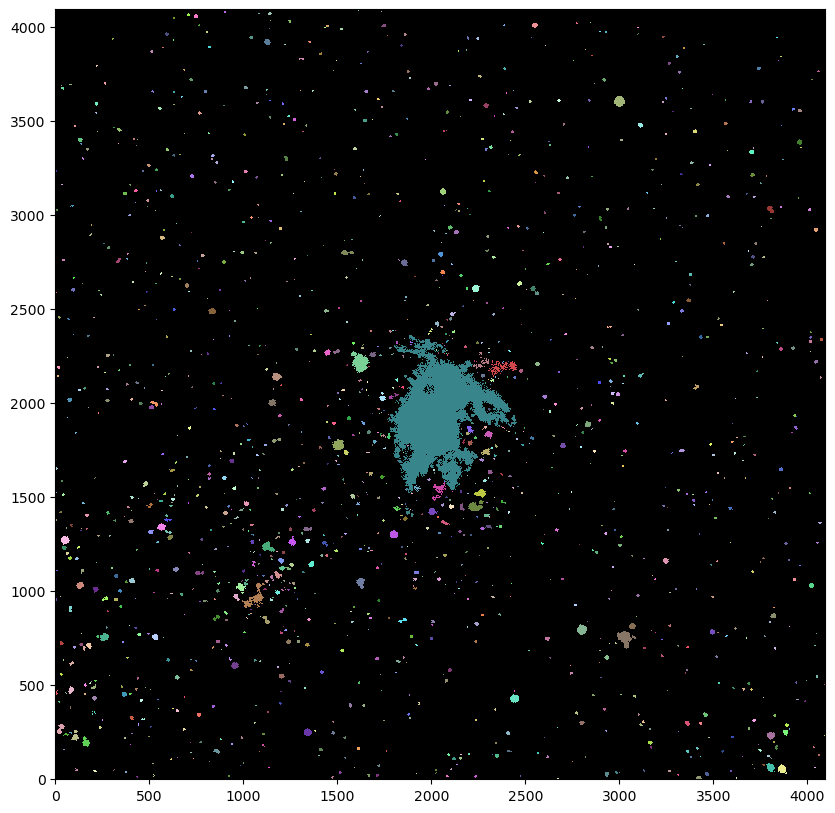

In [20]:
cmap_deblend = sour_deblend.make_cmap(seed=123)
#Y mostramos las fuentes
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour_deblend, origin='lower', cmap=cmap_deblend,interpolation='nearest')
plt.show()

In [21]:
#Obtenemos el catálogo
catalogo = SourceCatalog(data_ngcb, sour_deblend)
#Lo pasamos a tabla y lo mostramos
tablaB = catalogo.to_table()
tablaB

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,2588.103550169616,3.4515078133930643,None,2584,2592,0,8,36.0,2.1591516498681287,1.9259289739154306,32.456958943037776,0.4520667409716024,300.97051483501247,394.23466066376665,0.0,11807.973578415982,nan,168706.83760468045,nan
2,2675.954354651062,2.940390251152407,None,2669,2683,0,8,84.0,3.5258614342882346,2.0884565724694952,-0.709641681704905,0.8056989882820932,299.14018917530444,502.8576943958497,0.0,29578.15271116542,nan,285796.0661501045,nan
3,3423.668897632228,5.1153665974163856,None,3408,3441,0,17,422.0,5.978910296339435,3.76677353428134,0.6432804196625699,0.7765869850994871,298.968776530516,3186.4514337991736,0.0,387703.91578242625,nan,766385.9978087583,nan
4,3625.636166464378,5.841086280211863,None,3623,3629,1,9,29.0,2.135108496826948,1.5841567787825965,-87.21105048133055,0.6704484632839067,299.27735758736236,368.5674820143885,0.0,9211.700156417406,nan,158898.43178565413,nan
5,436.95046189687855,8.60795610540508,None,430,443,2,15,69.0,3.320761661344456,2.6661235939405215,-55.44417260057067,0.5961607627770884,299.0631888317414,353.56876938986557,0.0,22181.310041528868,nan,409701.9932195017,nan
6,1475.9771529228296,9.410289669622706,None,1468,1483,2,17,146.0,3.6266296288771085,3.437436305411392,-65.11021541689036,0.3187697265715159,299.5084881782826,423.13171003372423,0.0,49333.289467927054,nan,537255.7896859478,nan
7,924.7326176312736,14.15402944764285,None,918,932,6,21,140.0,3.4494066266988908,3.367482689549088,52.80686832528011,0.2166477264321713,298.977110669749,507.3715161195684,0.0,49143.89707931822,nan,596256.3402810065,nan
8,2236.5835613879344,14.153470496357468,None,2229,2245,7,21,179.0,3.9203379098923263,3.5470611168548585,-9.947962486924695,0.4258696318990722,299.5101090040316,506.65580916631353,0.0,65562.62550967708,nan,686303.8851739406,nan


In [22]:
tablaB = tablaB['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#Dividimos el "flujo" por el tiempo de exposición 
tablaB['segment_flux'] = tablaB['segment_flux']/header_ngcb['EXPTIME']
#Calculamos las magnitudes aparentes usando el zeropoint
zeropoint = 34.44
tablaB['magnitude'] = zeropoint - 2.5*np.log(tablaB['segment_flux'])
tablaB

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,2588.103550169616,3.4515078133930643,36.0,29.519933946039956,25.97733559467626
2,2675.954354651062,2.940390251152407,84.0,73.94538177791355,23.681683158490593
3,3423.668897632228,5.1153665974163856,422.0,969.2597894560656,17.248668308669785
4,3625.636166464378,5.841086280211863,29.0,23.029250391043515,26.598087089838437
5,436.95046189687855,8.60795610540508,69.0,55.45327510382217,24.401148059643166
6,1475.9771529228296,9.410289669622706,146.0,123.33322366981764,22.402775430484688
7,924.7326176312736,14.15402944764285,140.0,122.85974269829556,22.412391496334763
8,2236.5835613879344,14.153470496357468,179.0,163.9065637741927,21.691758669048887


In [23]:
#Mostramos las magnitudes
np.sort(tablaB['magnitude'])

2.694178634220304
8.95390399837935
10.271058881104054
10.387029054805055
10.410913575463962
11.062530538946088
11.76296855527869
12.125151874441613
12.13528327979239
12.30761332507791
12.642471057217591


**Catalogación con deblend NGC2070V**

In [24]:
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes
threshold = detect_threshold(data_ngcv, nsigma=3)
#Utilizamos el umbral y la imagen para detectar fuentes
sour = detect_sources(data_ngcv, threshold, npixels= 15)
#Mostramos el número de fuentes detectadas
sour

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 1027
labels: [   1    2    3    4    5 ... 1023 1024 1025 1026 1027]

In [25]:
#Usamos la función mencionada para separar las fuentes
sour_deblend = deblend_sources(data_ngcv, sour, npixels=15, nlevels=32,contrast=0.5)
#Mostramos el número de fuentes detectadas
sour_deblend

Deblending:   0%|          | 0/774 [00:00<?, ?it/s]

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 1027
labels: [   1    2    3    4    5 ... 1023 1024 1025 1026 1027]

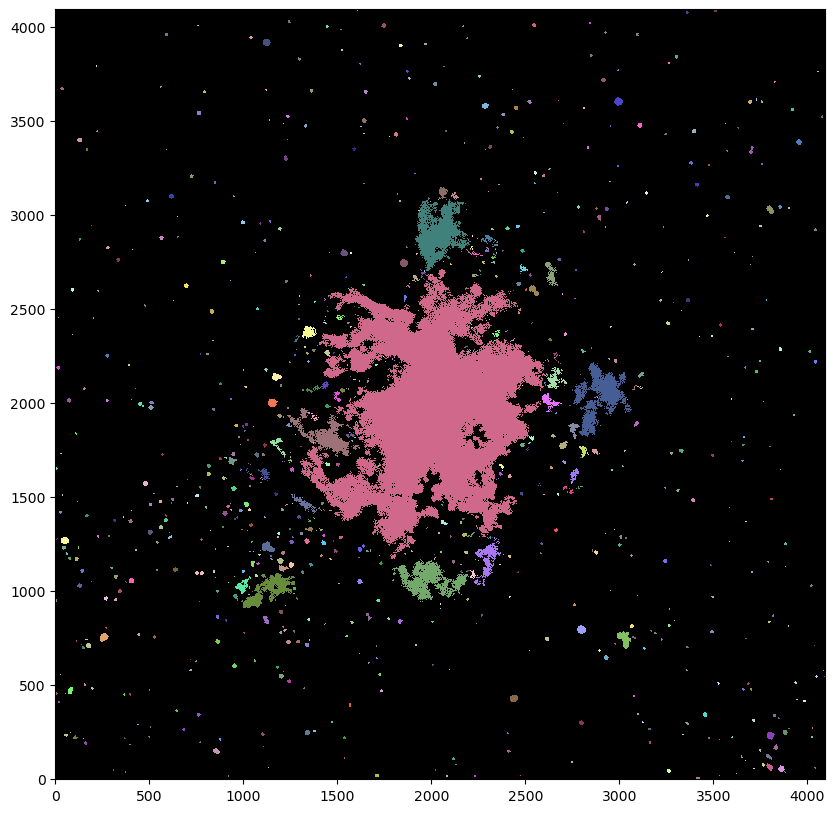

In [26]:
cmap_deblend = sour_deblend.make_cmap(seed=123)
#Y mostramos las fuentes
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour_deblend, origin='lower', cmap=cmap_deblend,interpolation='nearest')
plt.show()

In [27]:
#Obtenemos el catálogo
catalogo = SourceCatalog(data_ngcv, sour_deblend)
#Lo pasamos a tabla y lo mostramos
tablaV = catalogo.to_table()

In [28]:
tablaV = tablaV['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
#Dividimos el "flujo" por el tiempo de exposición 
tablaV['segment_flux'] = tablaV['segment_flux']/header_ngcv['EXPTIME']
#Calculamos las magnitudes aparentes usando el zeropoint
zeropointV = 42.01
tablaV['magnitude'] = zeropointV - 2.5*np.log(tablaV['segment_flux'])
tablaV

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,3421.055959411376,4.424132500404846,208.0,502.12943941423447,26.462855165266234
2,2084.927114466944,15.29746086125732,156.0,204.77822112557135,28.705181136624176
3,1711.8003135994995,18.539506752339,310.0,655.9677521191092,25.794720926548095
4,923.0684847246181,14.625760800853879,36.0,37.37500492998914,32.95749459095774
5,2234.2549134375445,14.501379536742217,68.0,71.6785788821078,31.32952014348328
6,2474.46306667768,15.689387745813319,21.0,20.87708304101735,34.413369869613426
7,3534.0094320508633,15.973813717402807,25.0,25.480739334600404,33.9151928836135
8,3621.5443007687913,28.370205983440428,46.0,46.728068564760896,32.399137439866664


In [29]:
#Mostramos las magnitudes
np.sort(tablaV['magnitude'])

4.931370588296403
13.475382760618558
13.900139996912582
14.837904551055779
15.266906362756412
15.623697478207138
15.967024379697406
16.290300298110765
17.1528371097739
17.25459617044965
17.31831614061241


**Siendo consistente con los catalogos, procederemos a identificar las fuentes para obtener las mismas para ambos filtros y asi luego producir el indice de color**

In [165]:
# Extrae las coordenadas x e y de ambas tablas
coord_ngcb = np.array(list(zip(tabla_ngcb['xcentroid'], tabla_ngcb['ycentroid'])))
coord_filtro_v = np.array(list(zip(tabla_ngcv['xcentroid'], tabla_ngcv['ycentroid'])))

# Construye un árbol KD para cada conjunto de coordenadas
tree_ngcb = cKDTree(coord_ngcb)
tree_filtro_v = cKDTree(coord_filtro_v)

# Establece un radio de coincidencia 
radio_coincidencia = 5

# Busca las coincidencias entre las dos tablas
coincidencias_ngcb = tree_filtro_v.query_ball_tree(tree_ngcb, radio_coincidencia)

#  nos ayudara a rastrear asignaciones únicas, asi las fuentes no se repiten 
asignaciones_ngcb = set()
asignaciones_filtro_v = set()

# Crea una nueva tabla con las fuentes coincidentes y sus magnitudes
tabla_indice_color = Table(names=['label_ngcb', 'label_ngcv', 'magnitud_ngcb', 'magnitud_ngcv'],
                    dtype=[int, int, float, float])

for i, coincidencias in enumerate(coincidencias_ngcb):
    if len(coincidencias) == 1:  # Solo hay una coincidencia, asignación única
        j = coincidencias[0]
        if j not in asignaciones_filtro_v:
            tabla_indice_color.add_row([tabla_ngcb['label'][j], tabla_ngcv['label'][i],
                                 tabla_ngcb['magnitude'][j], tabla_ngcv['magnitude'][i]])
            asignaciones_ngcb.add(j)
            asignaciones_filtro_v.add(i)

            
print(tabla_indice_color)

label_ngcb label_ngcv   magnitud_ngcb      magnitud_ngcv   
---------- ---------- ------------------ ------------------
         3          1 17.208668308669786 26.452855165266236
         9          2 22.812370325329447  28.69518113662418
        12          3 21.218957572906294 25.784720926548097
         7          4 22.372391496334764  32.94749459095773
         8          5  21.65175866904889  31.31952014348328
        14          6 26.266985525015894  34.40336986961343
        23         10 24.242605135396026 31.457285252484212
        25         11 20.983240025853462 24.727588978247383
        21         12 12.085151874441614 18.653210949230818
        31         15 25.018905559680363 33.019321027088566
       ...        ...                ...                ...
      1568       1013  19.95265821693893 26.479950754011735
      1570       1014 25.299411658180524 27.642123575369062
      1572       1015  22.93934540240148 29.308350183302892
      1574       1016 21.227389360086626

In [166]:
ngc_magnitud_B = tablaB['magnitude'].min()
ngc_magnitud_V = tablaV['magnitude'].min()

ngc_magnitud_B, ngc_magnitud_V

(2.694178634220304, 4.931370588296403)

In [167]:
# Nuestra estrella a estudiar, que es la fuente con mayor area, la agregaremos a la tabla
ngc2070b = np.argmax(tabla_ngcb['area']) 
label_ngc2070b = tabla_ngcb['label'][ngc2070b]
ngc2070v = np.argmax(tabla_ngcv['area']) 
label_ngc2070v = tabla_ngcv['label'][ngc2070v]

label_ngc2070b, label_ngc2070v

(723, 270)

In [168]:
# Agregamos nuestra nebulosa a la tabla para calcularle el indice de color 
tabla_indice_color.add_row([723, 270, 2.694178634220304, 4.931370588296403])  
print(tabla_indice_color), print("se verifica que se ha añadido, de 540 a 541")

label_ngcb label_ngcv   magnitud_ngcb      magnitud_ngcv   
---------- ---------- ------------------ ------------------
         3          1 17.208668308669786 26.452855165266236
         9          2 22.812370325329447  28.69518113662418
        12          3 21.218957572906294 25.784720926548097
         7          4 22.372391496334764  32.94749459095773
         8          5  21.65175866904889  31.31952014348328
        14          6 26.266985525015894  34.40336986961343
        23         10 24.242605135396026 31.457285252484212
        25         11 20.983240025853462 24.727588978247383
        21         12 12.085151874441614 18.653210949230818
        31         15 25.018905559680363 33.019321027088566
       ...        ...                ...                ...
      1570       1014 25.299411658180524 27.642123575369062
      1572       1015  22.93934540240148 29.308350183302892
      1574       1016 21.227389360086626  32.92712578766806
      1578       1017  20.74455503597876

(None, None)

In [169]:
tabla_indice_color['indice_color'] = tabla_indice_color['magnitud_ngcb'] - tabla_indice_color['magnitud_ngcv']
tabla_indice_color[label]
tabla_indice_color

label_ngcb,label_ngcv,magnitud_ngcb,magnitud_ngcv,indice_color
int32,int32,float64,float64,float64
3,1,17.208668308669786,26.452855165266236,-9.24418685659645
9,2,22.812370325329447,28.69518113662418,-5.882810811294732
12,3,21.218957572906294,25.784720926548097,-4.5657633536418025
7,4,22.372391496334764,32.94749459095773,-10.575103094622968
8,5,21.65175866904889,31.31952014348328,-9.667761474434393
14,6,26.266985525015894,34.40336986961343,-8.136384344597534
23,10,24.242605135396026,31.457285252484212,-7.214680117088186
25,11,20.983240025853462,24.727588978247383,-3.7443489523939206
21,12,12.085151874441614,18.653210949230818,-6.568059074789204


In [159]:
indice_color = Table()
indice_color['magnitud B'] = tabla_indice_color['magnitud_ngcb']
indice_color['indice_color'] = tabla_indice_color['indice_color']
indice_color

magnitud B,indice_color
float64,float64
17.208668308669786,-9.24418685659645
22.812370325329447,-5.882810811294732
21.218957572906294,-4.5657633536418025
22.372391496334764,-10.575103094622968
21.65175866904889,-9.667761474434393
26.266985525015894,-8.136384344597534
24.242605135396026,-7.214680117088186
20.983240025853462,-3.7443489523939206
12.085151874441614,-6.568059074789204


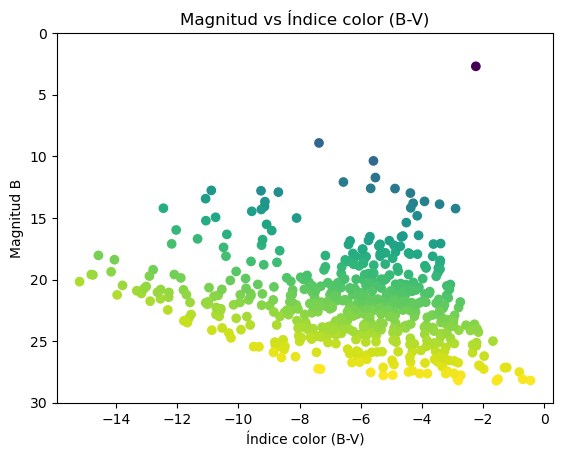

In [160]:
label = indice_color['magnitud B']
indice_color = indice_color['indice_color']


colors = np.sqrt(label**2 + indice_color**2)

plt.scatter(indice_color, label , marker='o', linestyle='-', c =colors , cmap='viridis')
plt.ylim(30, 0)
# Etiquetas y título
plt.xlabel('Índice color (B-V)')
plt.ylabel('Magnitud B')
plt.title('Magnitud vs Índice color (B-V)')
plt.savefig('C:\Yop\imagenes_astro\Indice_color')

# Mostrar el gráfico
plt.show()

In [ ]:
tabla_finalB = Table()

